In [ ]:
from TrainedModel import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from joblib import Parallel, delayed 
import joblib 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.patches import Patch



data = pd.read_csv('new_custom_data.csv')

data_frame = data.drop(['Src IP', 'Src Port', 'Dst IP', 'Protocol', 'Timestamp'],axis=1)




# print("Number of NaN values:", data.isna().sum().sum())
# print("Number of infinite values:", np.sum(np.isinf(data.values)))

# Replace infinite values with NaN
# data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
# data.dropna(inplace=True)

# print("Number of NaN values:", data.isna().sum().sum())
# print("Number of infinite values:", np.sum(np.isinf(data.values)))

X = data_frame.drop("Label",axis=1)
feature_names = data_frame.columns.tolist()[:-1]
# print(X.shape)
y = data_frame['Label']
# print(y.shape)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

rand_model =  RandomForestClassifier()
# X_train = X_train.iloc[:,2:]
# X_test = X_test.iloc[:,2:]
# print(X_train)

rand_model.fit(X_train, y_train)
Y_predict = rand_model.predict(X_test)
accuracy = accuracy_score(y_test, Y_predict)
report = classification_report(y_test, Y_predict)
# print("Accuracy:", accuracy)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, Y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend
plt.show()


# mymodel  = MultiAttentionLSTM_model()
# Y_predict = rand_model.predict(X_test)
# accuracy = accuracy_score(y_test, Y_predict)
# report = classification_report(y_test, Y_predict)



# print("Accuracy:", accuracy)
# print("Classification Report:\n", report)


# Extract feature importance
feature_importance = rand_model.feature_importances_

sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
legend_elements = [Patch(label='Importance')]
plt.legend(handles=legend_elements, loc='upper right')
# plt.gca().invert_xaxis()  # Invert x-axis to display most important features on the right
plt.show()

with open('new_trained.pkl','wb') as p:
    pickle.dump(rand_model,p)

In [18]:
doss_data = pd.read_csv('golden_eye.csv')

doss_data['Label'].replace('NeedManualLabel',1,inplace=True)
# doss_data

normal_flow = pd.read_csv('backup_flow.csv')
normal_flow['Label'].replace('NeedManualLabel',0,inplace=True)
normal_flow

doss_data.to_csv('doss.csv')
normal_flow.to_csv('normal')






/tmp/ipykernel_33025/2781429572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  doss_data['Label'].replace('NeedManualLabel',1,inplace=True)
/tmp/ipykernel_33025/2781429572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  doss_data['Label'].replace('NeedManualLabel',1,inplace=True)
/tmp/ipyke

[3 1 4 ... 1 0 1]
[3 1 4 ... 1 0 1]
10963    3
13163    1
9997     4
14823    0
20128    0
        ..
16809    0
10102    1
18853    1
7642     0
19798    1
Name: Label, Length: 4262, dtype: int64


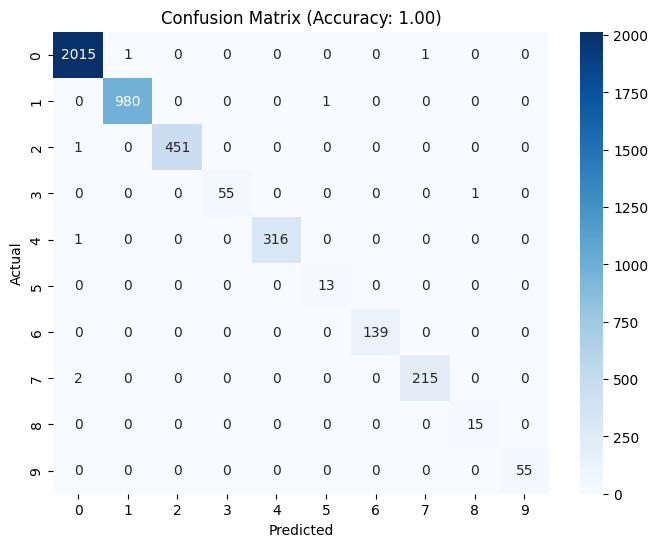

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



print(Y_predict)
Y_predict = np.array(Y_predict)
print(Y_predict)
print(y_test)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, Y_predict)

# Calculate accuracy
accuracy = accuracy_score(y_test, Y_predict)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend
plt.show()


In [33]:
model = pickle.load(open('trained.pkl','rb'))
ds = pd.read_csv('final_set.csv')
ds.drop(['Label'],axis=1)

ds = ds.iloc[:,:-1]
ds= ds.iloc[:,1:]
print(ds.columns)
ds
# model.predict(ds)


Index(['Dst Port', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count',

,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,601994.752884,6,7,2639,545,2182.0,54.0,439.833333,780.031499,...,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,26473.999023,1,1,97,469,97.0,97.0,97.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,26254.177094,1,1,97,249,97.0,97.0,97.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,5474.567413,1,1,108,201,108.0,108.0,108.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,443,105231.046677,9,10,1790,2187,726.0,54.0,198.888889,209.069603,...,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,53,6193.161011,1,1,77,506,77.0,77.0,77.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,53,5706.071854,1,1,77,530,77.0,77.0,77.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,443,36455.869675,2,2,147,153,93.0,54.0,73.500000,19.500000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,67,1952.648163,1,1,340,342,340.0,340.0,340.000000,0.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data  = pd.read_csv('flow.csv')
header1 = data.columns



# print(header1)
header1 = list(header1)

rmv_list = ["Src IP","Src Port","Protocol","Timestamp","Dst IP"]
data = data.drop(rmv_list,axis=1)
header_replace = data.columns
print(header_replace)
print(len(data.columns))


Index(['Dst Port', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count',

In [8]:
test_data = pd.read_csv('final_data_set.csv')
header2 = test_data.columns
print(header2)
# print(len(header2))

remove_list = ["CWE Flag Count","Fwd Seg Size Avg","Bwd Seg Size Avg","Subflow Fwd Pkts","Subflow Fwd Byts","Subflow Bwd Pkts","Subflow Bwd Byts"]
test_data = test_data.drop(remove_list,axis=1)
test_data.columns = header_replace
test_data
test_data.to_csv('final_data.csv')
print(len(test_data.columns))


Index(['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

In [9]:
data_frame = pd.read_csv('flow.csv')
print(data_frame.columns)

Index(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Varianc